In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simple Linear Regression 

In [2]:
#Dataset
df=pd.read_csv("Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

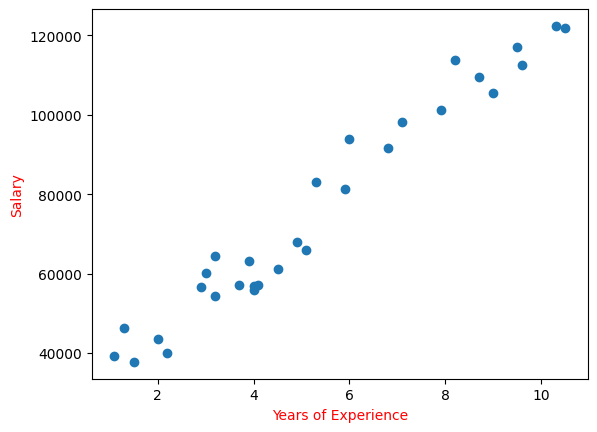

In [5]:
#check relationship with feature
plt.scatter(df["YearsExperience"],df["Salary"])
plt.xlabel("Years of Experience",color="r")
plt.ylabel("Salary",color="r")
plt.show()

In [6]:
#finding correlations between features
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [7]:
#splitting dataset into dependent and Independent features
X=df[["YearsExperience"]]
y=df["Salary"]
# X,y

In [8]:
#splitting dataset into train test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
#Apply ML algorithm for Simple Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [10]:
print("Coefficient:",regressor.coef_)

Coefficient: [9371.0160797]


In [11]:
print("Intercept:",regressor.intercept_)

Intercept: 25478.12743600038


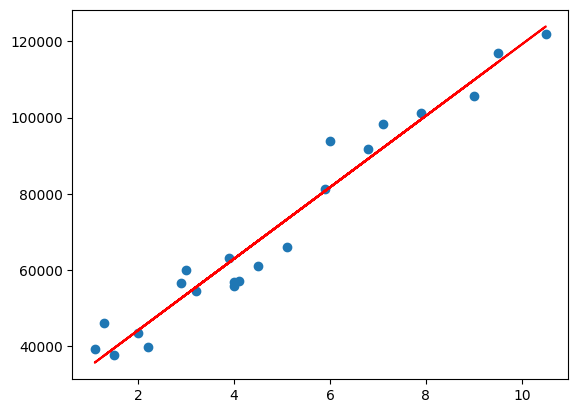

In [12]:
#plot training data
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),color='r')

In [13]:
#Prediction with test dataset
y_pred=regressor.predict(X_test)

In [14]:
#Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)

In [15]:
print("mse:",mse)
print("mae:",mae)
print("rmse:",rmse)
print("score:",score)

mse: 38802588.99247065
mae: 5056.995466663592
rmse: 6229.172416338358
score: 0.9347210011126782


# Multiple Linear Regression

In [16]:
import seaborn as sns

In [17]:
data=pd.read_csv("Student_Performance.csv")

In [18]:
data.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [19]:
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [20]:
data.corr()

C:\Users\rajes\AppData\Local\Temp\ipykernel_6792\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


#### Here my Traget feature is Performance Index

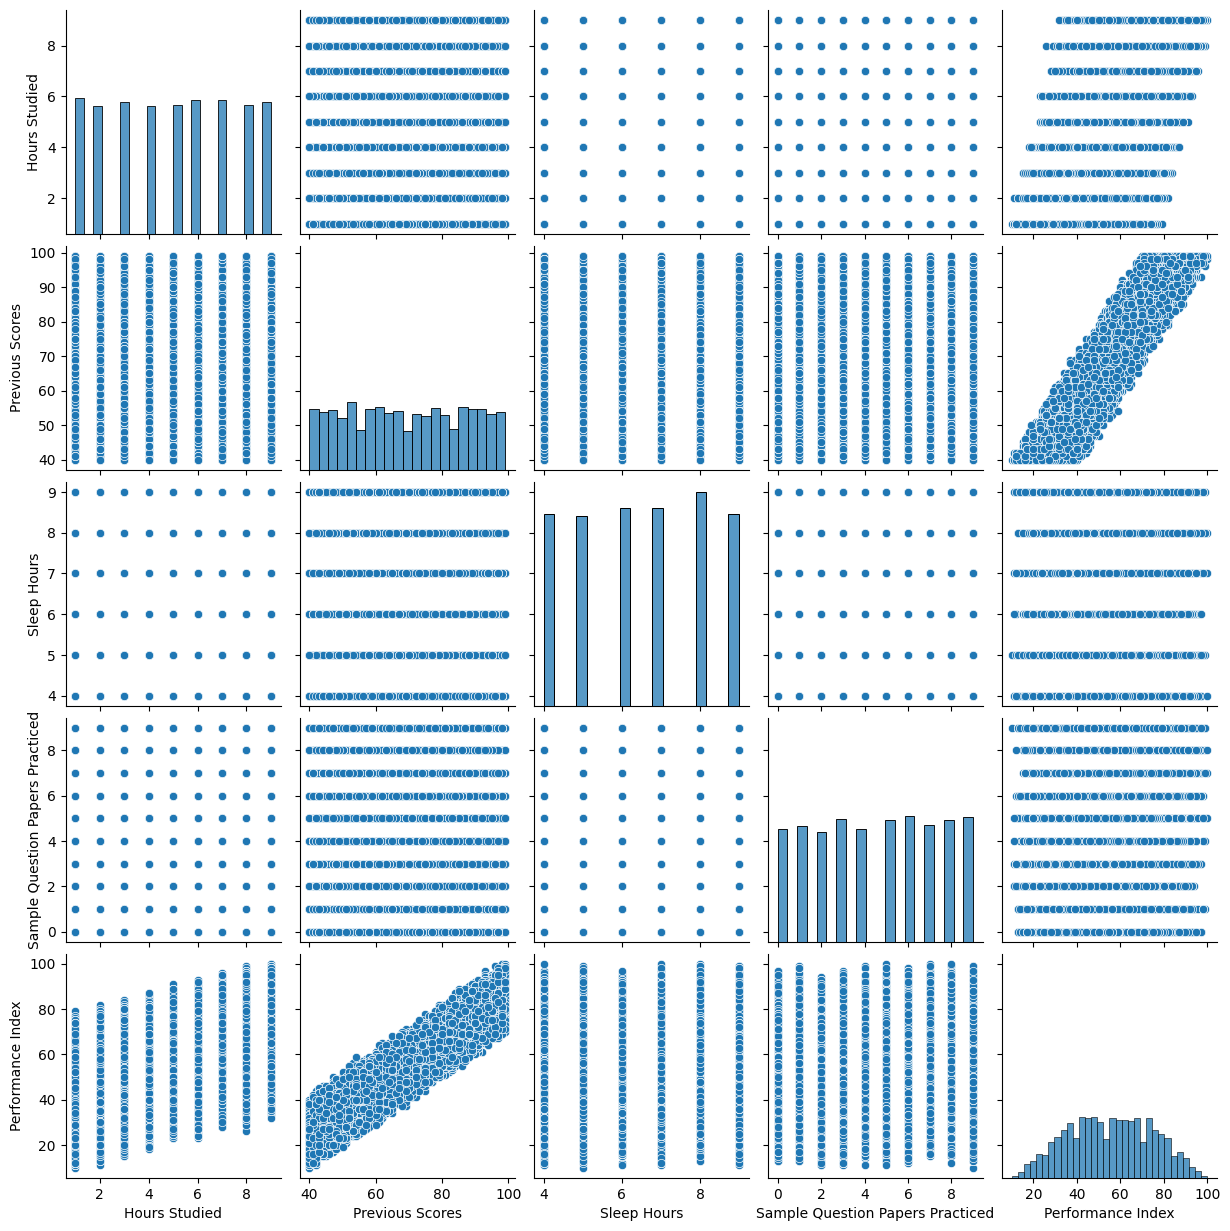

In [21]:
sns.pairplot(data)

In [22]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

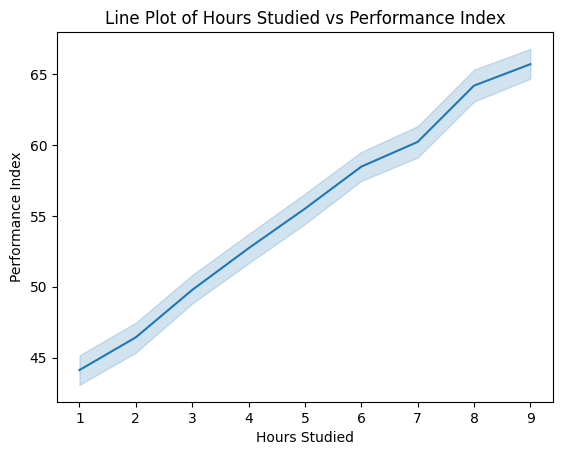

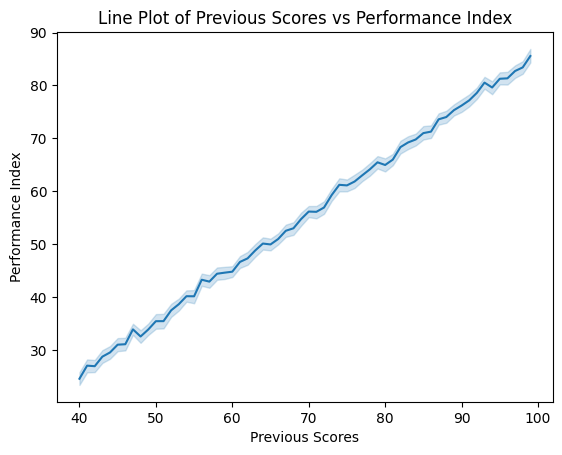

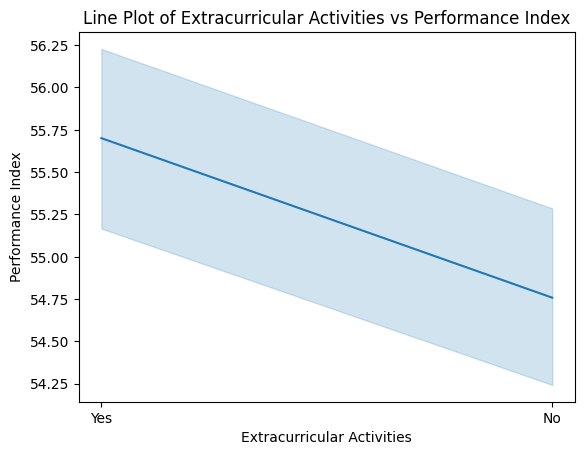

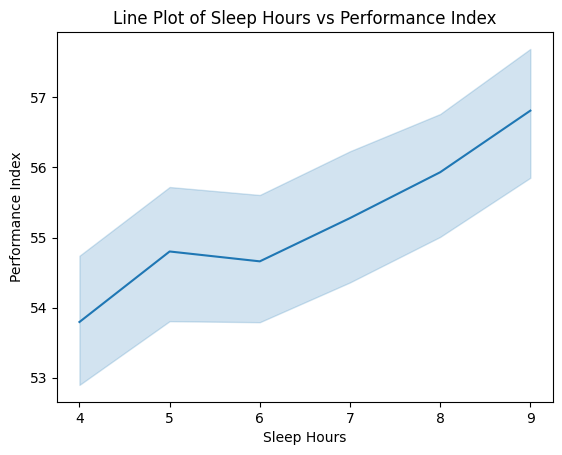

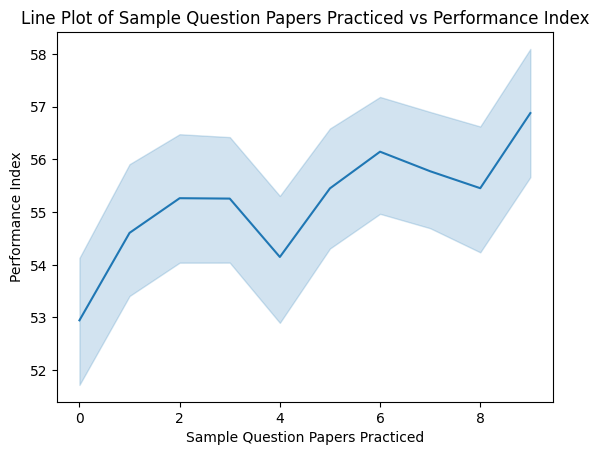

In [23]:
for i in data.columns:
    if i == 'Performance Index':
        continue  # Skip the 'Performance Index' column

    # Create a new figure for each plot
    plt.figure()
    sns.lineplot(x=data[i], y=data['Performance Index'])
    plt.title(f'Line Plot of {i} vs Performance Index')
    plt.show()

In [24]:
#Label encoder on Extracurricular Activities feature
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [25]:
data["Extracurricular Activities"]=encoder.fit_transform(data["Extracurricular Activities"])

In [26]:
data["Extracurricular Activities"].value_counts()

0    5052
1    4948
Name: Extracurricular Activities, dtype: int64

In [27]:
#Split the dataset into dependent and independent feature
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [28]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [29]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [30]:
X.shape, y.shape

((10000, 5), (10000,))

In [31]:
X.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
7031,6,76,0,6,4
5345,1,55,1,4,0
8227,1,60,1,5,3
5576,6,81,0,7,2
4354,4,50,1,4,9


In [32]:
y.sample(5)

18      30.0
6951    59.0
8473    55.0
350     68.0
9466    42.0
Name: Performance Index, dtype: float64

In [33]:
# splitting dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
#Apply ML algorithm for Simple Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [35]:
#To check validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regressor,X_train,y_train,scoring="neg_mean_squared_error",cv=3)
np.mean(validation_score)

-4.2027969495394295

In [36]:
#Prediction
y_pred=regressor.predict(X_test)

### Metrics evaluation
#### Performance Metrics

In [37]:
#Metrics evaluation
#Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)

In [38]:
print("mse:",mse)
print("mae:",mae)
print("rmse:",rmse)
print("score:",score)

mse: 4.032544215419114
mae: 1.5975792091646104
rmse: 2.0081195719924434
score: 0.9890550757439104


In [39]:
# Assumption
residual=y_test-y_pred
print(residual)

6252   -3.731879
4684   -2.612111
1731   -1.908388
4742   -3.301042
4521   -2.035815
          ...   
4862    0.575641
7025   -1.000419
7647    1.926030
7161    2.313632
73     -2.858164
Name: Performance Index, Length: 2500, dtype: float64


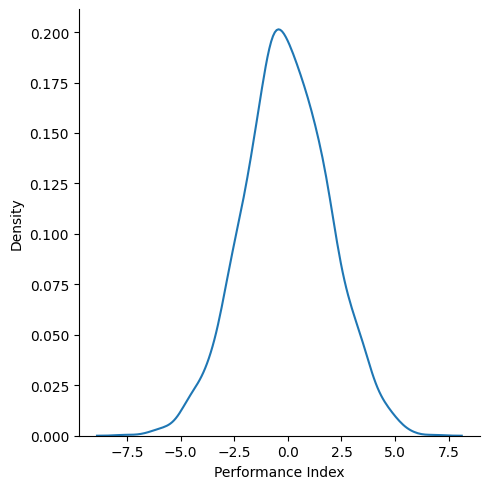

In [40]:
sns.displot(residual,kind="kde")

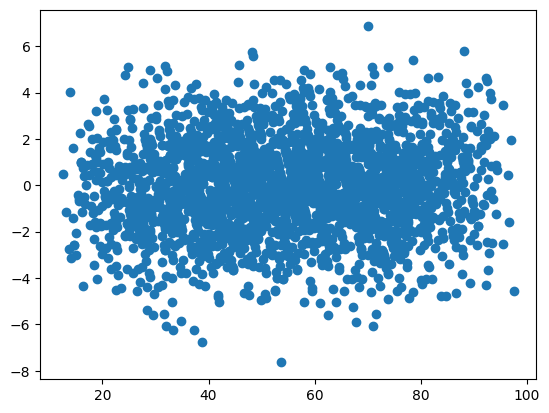

In [41]:
plt.scatter(y_pred,residual)

# Polynomial Regression

#### A simple linear regression algorithm only works when the relationship between the data is linear. But suppose we have non-linear data, then linear regression will not be able to draw a best-fit line. Consider the below diagram, which has a non-linear relationship, and you can see the linear regression results on it, which does not perform well, meaning it does not come close to reality. Hence, we introduce it to overcome this problem, which helps identify the curvilinear relationship between independent and dependent variables.
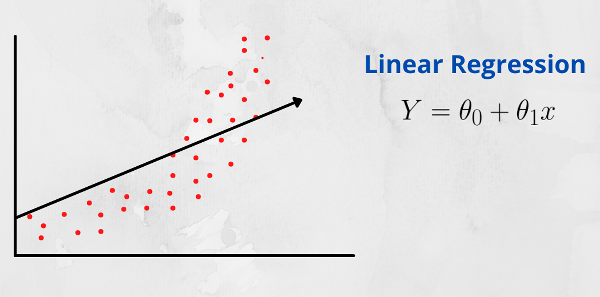

y = a0 + a1x1 + a2x12 + … + anx1n


In [43]:
dataset=pd.read_csv("Position_Salaries.csv")

In [44]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [45]:
dataset.corr()

C:\Users\rajes\AppData\Local\Temp\ipykernel_6792\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [82]:
# For the features we are selecting all the rows of column Level 

X=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2].values

In [83]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [84]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [85]:
#Linear Regression
linregressor=LinearRegression()
linregressor.fit(X,y)

LinearRegression()

In [86]:
y_pred=linregressor.predict(X)

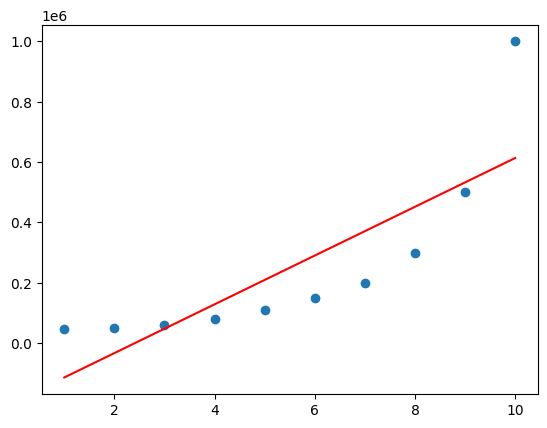

In [91]:
plt.scatter(X,y)
plt.plot(X,y_pred,color="r")

In [93]:
#Metrics evaluation
#Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse=mean_squared_error(y,y_pred)
mae=mean_absolute_error(y,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y,y_pred)

In [113]:
print("mse:",mse)
print("mae:",mae)
print("rmse:",rmse)
print("score:",score)

mse: 26695878787.878784
mae: 128454.54545454546
rmse: 163388.73519272613
score: 0.6690412331929895


In [96]:
"""Above as we can see the the best fit line and model accuracy are
not trained well"""

'Above as we can see the the best fit line and model accuracy are\nnot trained well'

In [97]:
# Ploynomial Linear Regression¶
from sklearn.preprocessing import PolynomialFeatures

In [102]:
poly=PolynomialFeatures(degree=2,include_bias=True)

In [104]:
X_poly=poly.fit_transform(X)

In [105]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [107]:
regressor1=LinearRegression()

In [108]:
regressor1.fit(X_poly,y)

LinearRegression()

In [110]:
y_pred=regressor1.predict(X_poly)

In [111]:
y_pred

array([118727.27272727,  44151.51515152,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

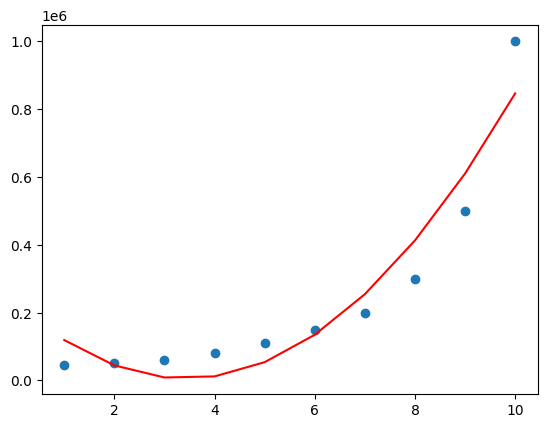

In [112]:
plt.scatter(X,y)
plt.plot(X,y_pred,color="r")

In [114]:
#Metrics evaluation
#Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse=mean_squared_error(y,y_pred)
mae=mean_absolute_error(y,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y,y_pred)

In [115]:
print("mse:",mse)
print("mae:",mae)
print("rmse:",rmse)
print("score:",score)

mse: 6758833333.33333
mae: 70218.18181818174
rmse: 82212.12400451244
score: 0.9162082221443943


In [2]:
def poly_reg(data,degree):
    poly=PolynomialFeatures(degree=degree,include_bias=True)
    X_poly=poly.fit_transform(X)
    regressor1=LinearRegression()
    regressor1.fit(X_poly,y)
    y_pred=regressor1.predict(X_poly)
    plt.scatter(X,y)
    plt.plot(X,y_pred,color="r")
    #Performance Metrics
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    mse=mean_squared_error(y,y_pred)
    mae=mean_absolute_error(y,y_pred)
    rmse=np.sqrt(mse)
    score=r2_score(y,y_pred)
    print("mse:",mse)
    print("mae:",mae)
    print("rmse:",rmse)
    print("score:",score)

In [3]:
poly_reg(X,3)

NameError: name 'X' is not defined

mse: 210343822.84382358
mae: 12681.818181823166
rmse: 14503.23490962701
score: 0.9973922891706614


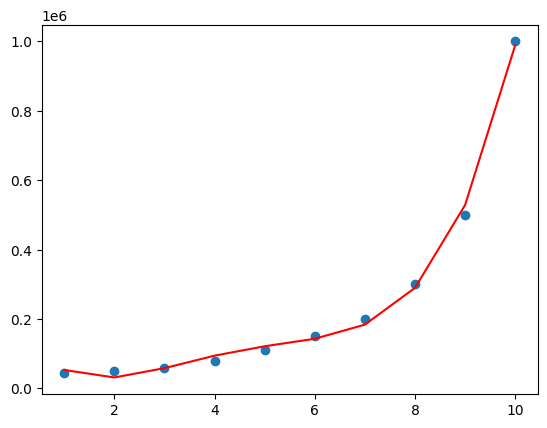

In [119]:
poly_reg(X,4)

mse: 16382284.382290224
mae: 3360.8391609209807
rmse: 4047.503475265985
score: 0.9997969027099753


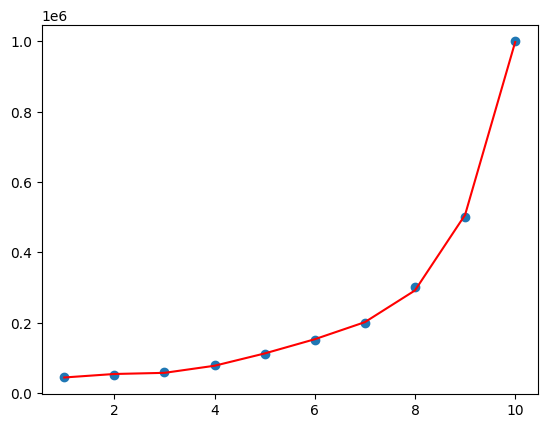

In [120]:
poly_reg(X,5)

### As we increase the degree, the best-fit line improves, and the accuracy also increases."

In [122]:
res=y-y_pred

In [123]:
res

array([ -73727.27272727,    5848.48484848,   51560.60606061,
         68409.09090909,   56393.93939394,   15515.15151515,
        -54227.27272727, -112833.33333333, -110303.03030303,
        153363.63636364])

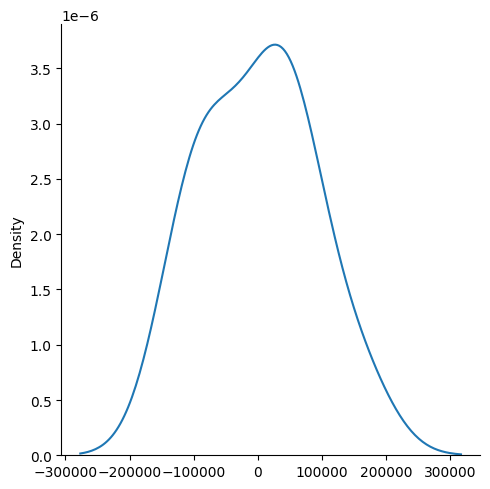

In [124]:
sns.displot(res,kind="kde")